In [1]:
import numpy as np
import time as time
import matplotlib.pyplot as plt
import math
import itertools

In [16]:
def BruteForce(input_):

  # num, b, c, a = importlist(input_)
    num, b, c, a = input_
    x_values = list(itertools.product([0, 1], repeat = num))
  
    feasible_z = []

    for x in range(len(x_values)):
        constraints_satisfied = 0
        for k in range(len(b)):
            if np.dot(x_values[x], a[k]) <= b[k]:
                constraints_satisfied += 1
        if constraints_satisfied == len(b): # only if all the constraints are satisfied
            obj = []
            for z in c:
                obj.append(np.dot(x_values[x], z))
          
            if obj not in feasible_z:
                feasible_z.append(obj)

    feasible_z = np.array(feasible_z)
    feasible_z = feasible_z[np.argsort(feasible_z[:, 0])]
    
    next_point = 0  # Next index in the NDP array to search for 

    while next_point < len(feasible_z):
        ndp = np.any(feasible_z < feasible_z[next_point], axis = 1)
        ndp[next_point] = True
        feasible_z = feasible_z[ndp]
        next_point = np.sum(ndp[:next_point]) + 1

    return feasible_z

In [17]:
def randInstanceGen(n,m,J,U):
    # Reset seed for safety
    np.random.seed(0)
    # Set seed
    np.random.seed(61836)
    
    c = np.random.randint(1,U+1,(J,n))
    a = np.random.randint(1,U+1,(n,m))
    
    b = np.max(a, axis=0)
    
    for i in range(0, m):
        if math.ceil(np.sum(a[:,i])/2) > b[i]:
            b[i] = math.ceil(np.sum(a[:,i])/2)
    
    return c, a, b

In [19]:
c, a, b = randInstanceGen(15, 1, 3, 40)

In [20]:
def setup(c, a, b):
    c = c*-1
    b = list(b)
    c = list(c)

    for j in range(len(c)):
        c[j] = list(c[j])

    att = []
    for i in range(a.shape[1]):
        att.append(list(a[:, i]))
  
    items = (len(c[0]), b, c, att)

    return items

In [28]:
def Complexity(m, num_obj, U):
  
    times = []
    num_items = []

    for ind in range(1, 16):
        c, a, b = randInstanceGen(ind, 1, num_obj, U)
        num_items.append(ind)
        items = setup(c, a, b)
        start = time.time()
        ndf = BruteForce(items)
        end = time.time() - start
        times.append(end)

    plt.plot(num_items, times)
    plt.xlabel("Number of Items (n)")
    plt.ylabel("Time (s)")
    plt.title("Brute Force Complexity")
    plt.savefig('BF_complexity_n.pdf')

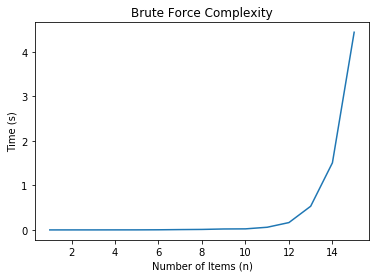

In [29]:
Complexity(2, 2, 40)